## Exploring Relationships

## Table of Contents
 01. Importing Libraries and Data
 02. Create a subset of your data
 03. Create a correlation matrix heatmap
 04. Create scatterplots for variables with strongest correlations
 05.Create a pair plot of entire data set
 06. Create a categorical plot
 07. Revist questions
 08. Define a hypothesis

## 01. Importing Libraries and Data

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Importing Data
path = r'C:\Users\javir\Downloads\Javis Data Analytics stuff\Achievement 6\LoL Regional Project'
df = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'combined.csv'), index_col = False)

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
# Checking data
df.shape

(400000, 42)

In [5]:
df

server  season_id    match_id    game_created  game_duration  team  \
0       Brazil         11  1464336847  <1536777218683           1278     1   
1       Brazil         11  1464336847  <1536777218683           1278     0   
2       Brazil         11  1469537223  <1537133828880           1689     1   
3       Brazil         11  1469537223  <1537133828880           1689     0   
4       Brazil         11  1476908929  <1537913707045           1503     1   
...        ...        ...         ...             ...            ...   ...   
399995  Turkey         11   754852101  <1536781560637           1538     0   
399996  Turkey         11   734977956  <1532462844338           2217     1   
399997  Turkey         11   734977956  <1532462844338           2217     0   
399998  Turkey         11   748423621  <1535495972554           1484     1   
399999  Turkey         11   748423621  <1535495972554           1484     0   

         map_side  win  outcome  wards_placed  first_blood  first_tower  \
0       Blue Side    0   Defeat            34            0            0   
1        Red Side    1  Victory            50            1            1   
2       Blue Side    0   Defeat            45            0            0   
3        Red Side    1  Victory           102            1            1   
4       Blue Side    1  Victory            31            1            1   
...           ...  ...      ...           ...          ...          ...   
399995   Red Side    0   Defeat            50            1            0   
399996  Blue Side    1  Victory            59            0            0   
399997   Red Side    0   Defeat            79            1            1   
399998  Blue Side    0   Defeat            25            1            0   
399999   Red Side    1  Victory            44            0            1   

        first_inhibitor  first_dragon  first_rift_herald  first_baron  \
0                     0             0                  0            0   
1                     0             1                  1            1   
2                     0             0                  0            0   
3                     1             1                  1            1   
4                     1             1                  1            1   
...                 ...           ...                ...          ...   
399995                0             0                  0            0   
399996                1             1                  0            1   
399997                0             0                  1            0   
399998                0             0                  0            0   
399999                1             1                  1            0   

        team_kills  tower_kills  inhibitor_kills  dragon_kills  \
0                9            1                0             0   
1               15            3                0             2   
2               14            5                0             1   
3               31            7                1             2   
4               31           10                3             3   
...            ...          ...              ...           ...   
399995          21            2                0             0   
399996          36            7                1             1   
399997          49            6                0             3   
399998          18            0                0             0   
399999          30           10                2             3   

        rift_herald_kills  baron_kills      ban1     ban2     ban3      ban4  \
0                       0            0   Camille  Alistar  Leblanc     Talon   
1                       1            1  Kassadin    Talon    Yasuo     Akali   
2                       0            0    Aatrox     Nami  Camille      Pyke   
3                       1            1    Graves  Morgana    Talon  Vladimir   
4                       1            1   Evelynn    Akali   Singed  Vladimir   
...                 

## 02. Create a subset of your data

In [6]:
# Creating subsets which will only include columns we are interested in.
sub = df[['game_duration', 'team', 'win', 'wards_placed', 'first_blood', 'first_tower', 'first_inhibitor', 'first_dragon', 'first_rift_herald','first_baron', 'team_kills', 'tower_kills', 'inhibitor_kills', 'dragon_kills', 'baron_kills', 'solo_kills', 'duo_kills', 'trio_kills', 'quad_kills', 'penta_kills']]

## 03. Create a correlation matrix heatmap

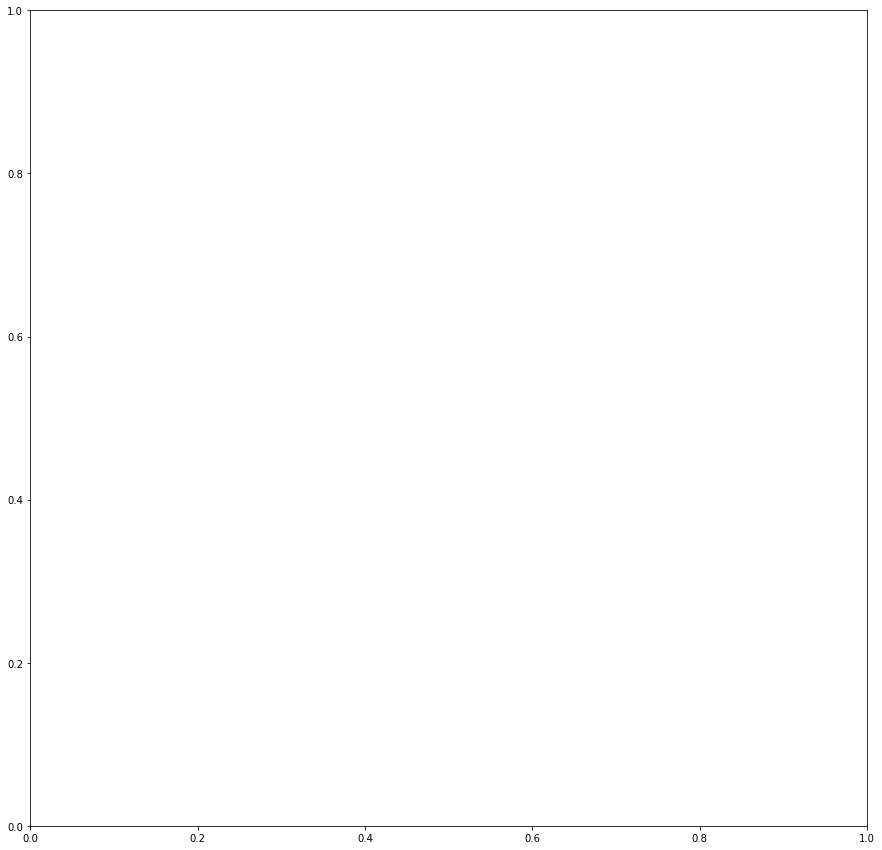

In [7]:
# Creating a subplot with empty outputs
f,ax = plt.subplots(figsize=(15,15))

In [8]:
# Creating a correlation heatmap using seaborn
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

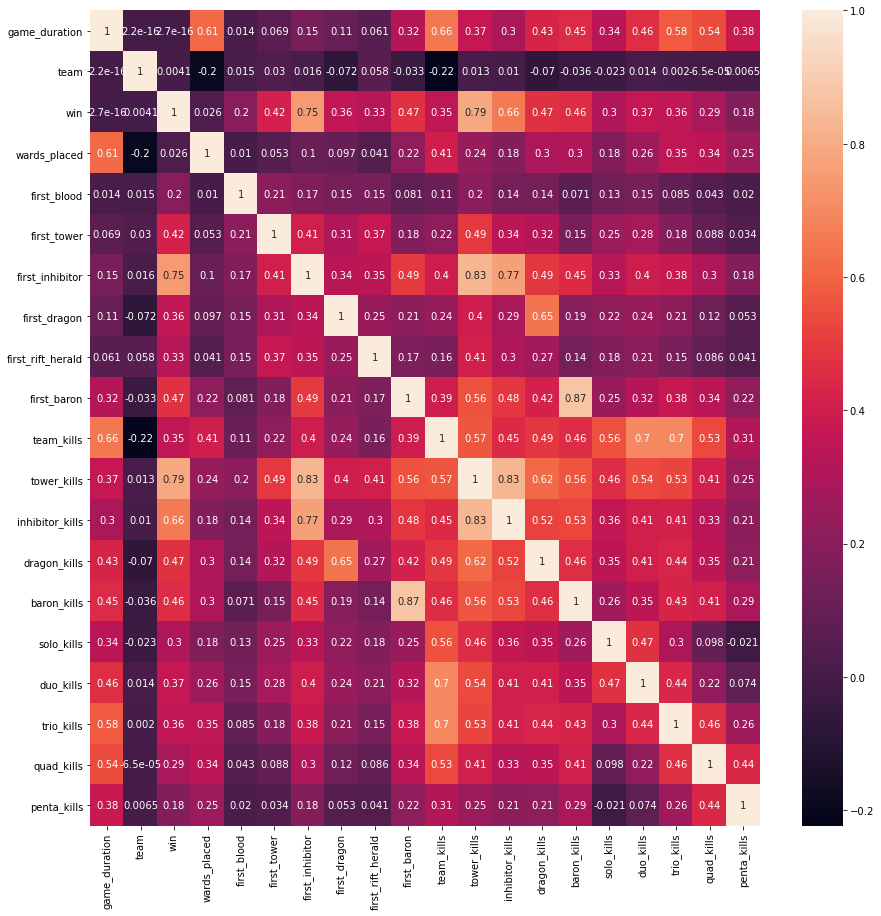

In [9]:
corr.figure

## 04. Create scatterplots for variables with strongest correlations

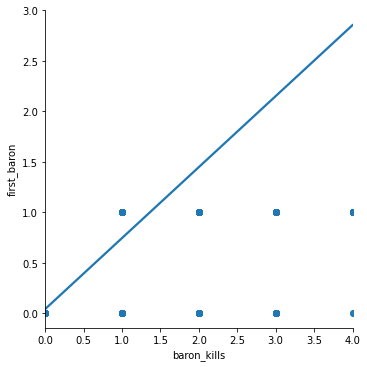

In [11]:
# Correlation of 0.87
sns.lmplot(x = 'baron_kills', y = 'first_baron', data = df)

Due to the nature of 'first_"objective"' columns, they only support 0/1 responses, while still valuable, it makes scatterplots, interesting to say the least. We will observe other correlations for charting purposes.

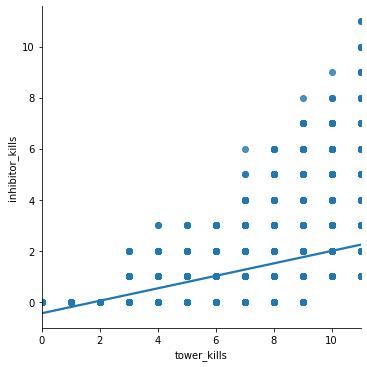

In [12]:
# Correlation of 0.83
sns.lmplot(x = 'tower_kills', y = 'inhibitor_kills', data = df)

This chart shows a positive correlation, there seems to be alot of data points above the line. For this scatterplot, 11 is the max number of tower_kills possible, while inhibitor_kills is infinite but only 1 is needed to win a match.
There are instances where a team can surrender before any tower or inhibitor is destroyed resulting in both having 0's

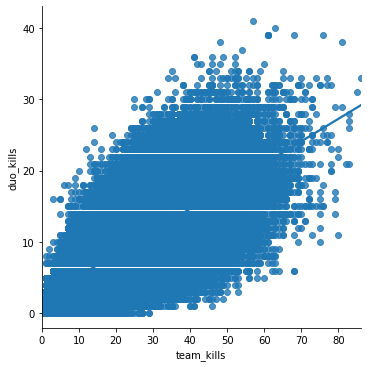

In [13]:
# Correlation of 0.7
sns.lmplot(x = 'team_kills', y = 'duo_kills', data = df)

It becomes difficult to see the line with 400,000 different points on a compressed chart, however we can see a positive trend line with the more team_kills acquired the more likely they are done with a team of 2 to secure the kill.

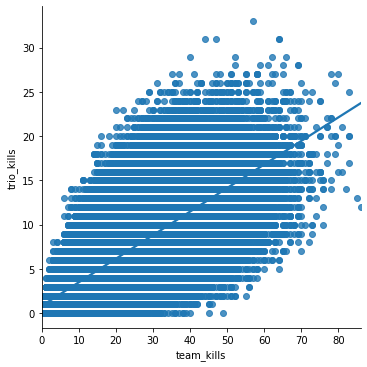

In [14]:
# Correlation of 0.7
sns.lmplot(x = 'team_kills', y = 'trio_kills', data = df)

This chart has the same correlation score as duo_kills, indicating that just as likely a team gets more team_kills, they are just as equally likely to be done by a team of 3 securing the kill.

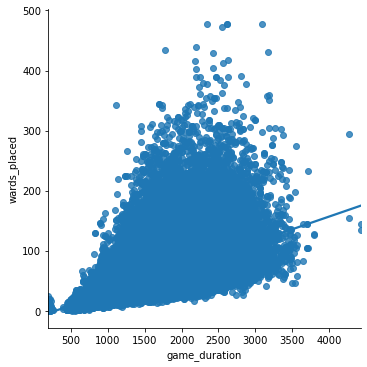

In [15]:
# Correlation of 0.61
sns.lmplot(x = 'game_duration', y = 'wards_placed', data = df)

This chart shows a positive trend line in that the longer the game_duration, the more wards_placed in a match.

## 05. Create a pair plot of entire data set

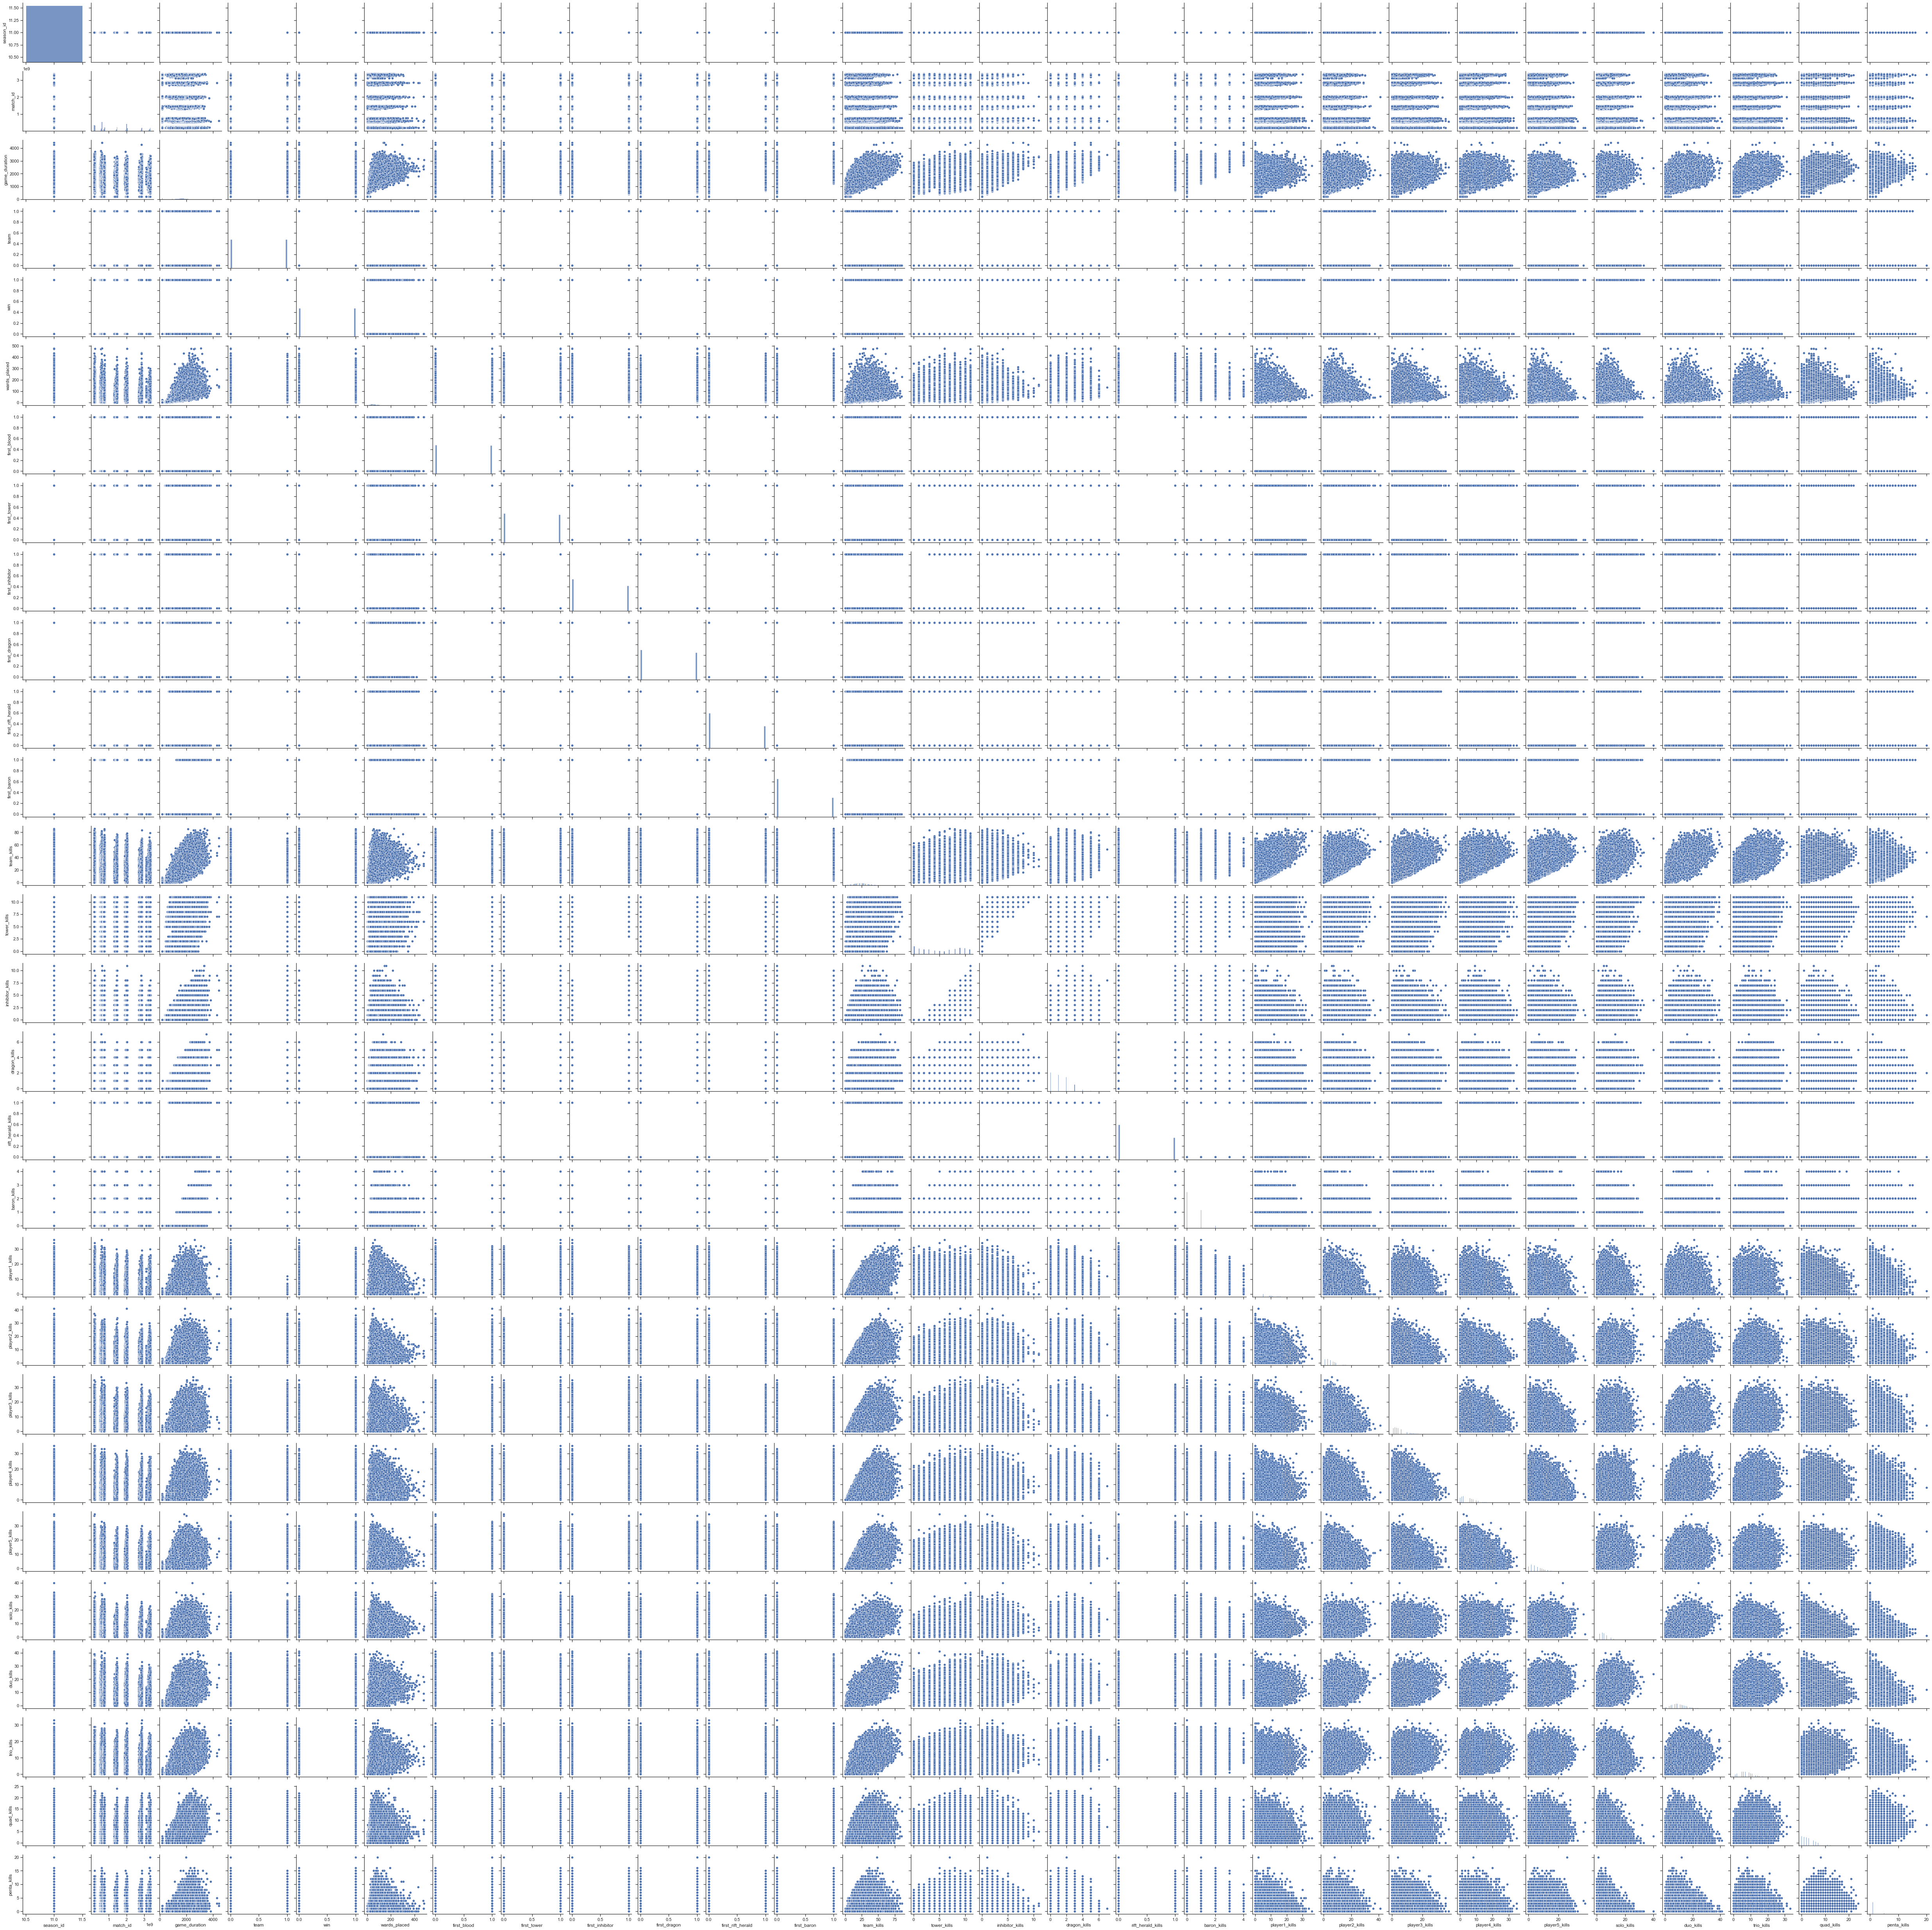

In [31]:
# Creating a pair plot of our entire data frame
pair = sns.pairplot(df)

Well thats a lot of charts, lets tone it down to our subset

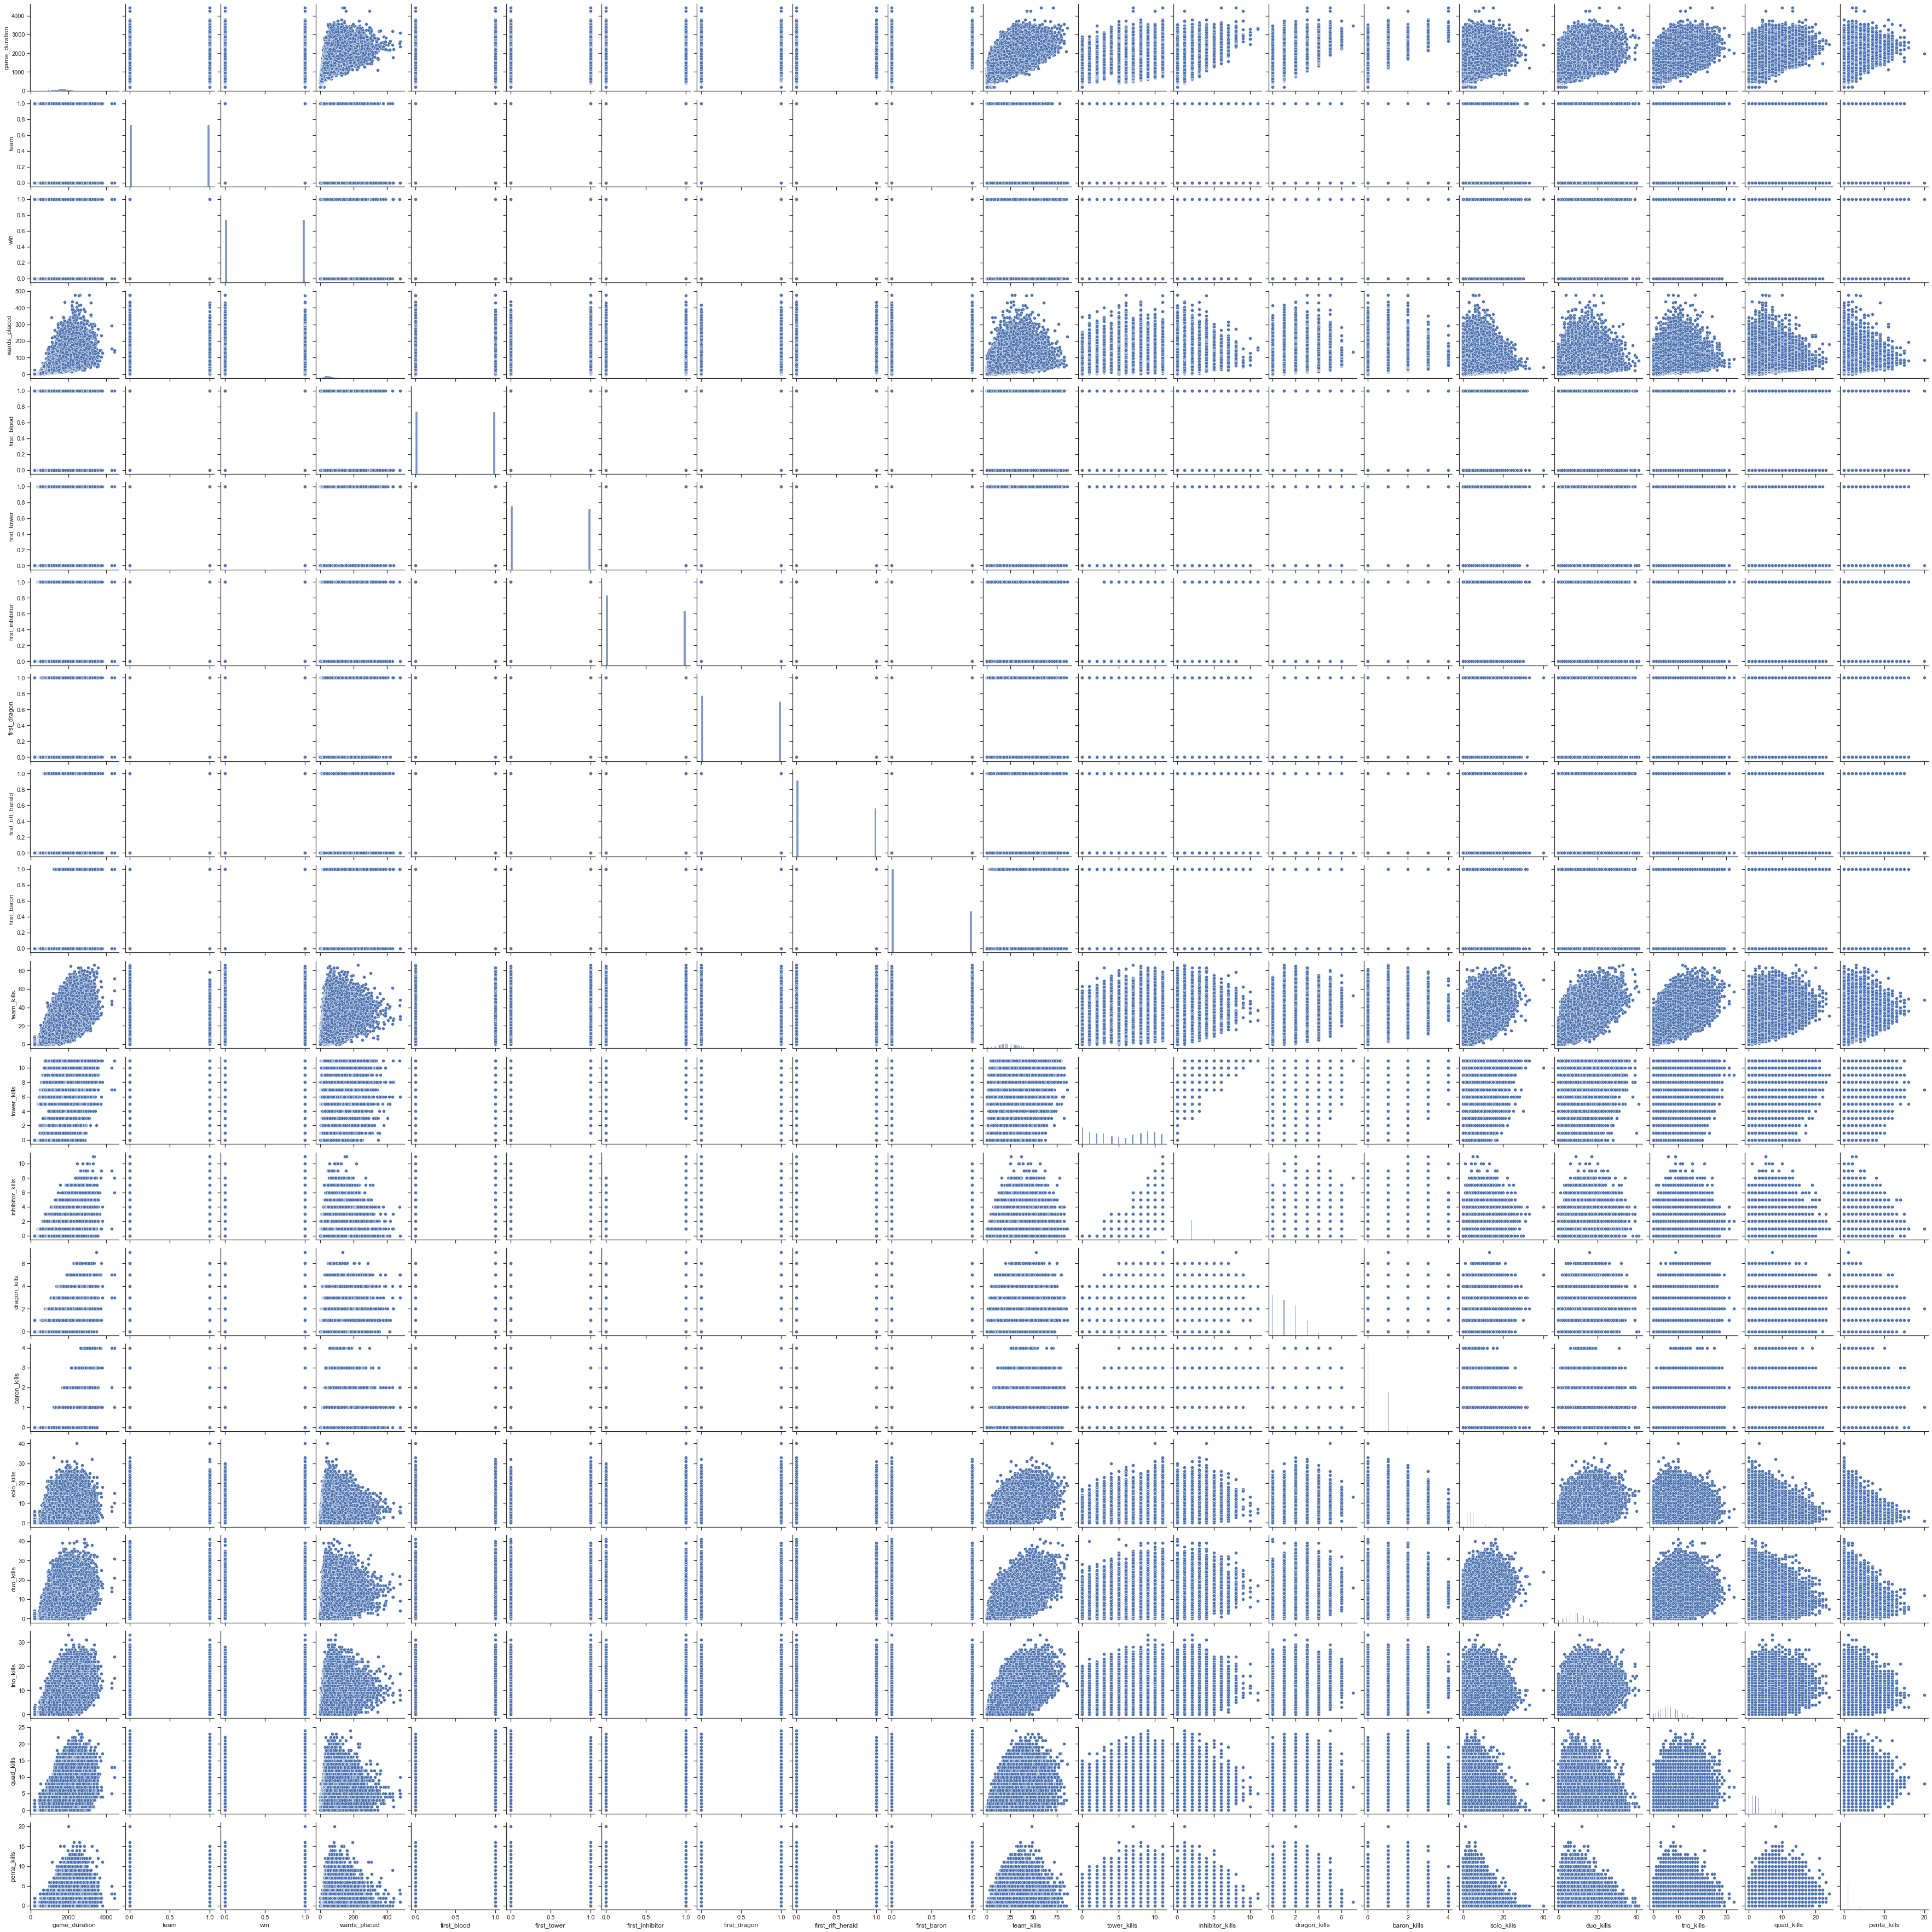

In [32]:
pair = sns.pairplot(sub)

Let's create another subset with less

In [35]:
sub_2 = df[['game_duration', 'wards_placed', 'team_kills', 'solo_kills']]

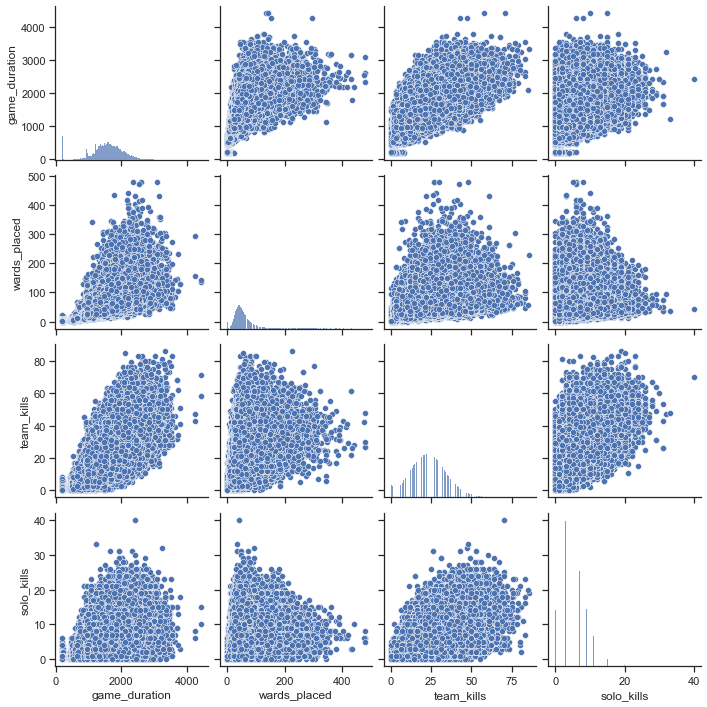

In [36]:
pair = sns.pairplot(sub_2)

I would like to dive deeper in the different charts comparing 'solo_kills' vs 'duo trio quad penta_kills' as this show us what kind of play is more likely to get you ahead/leads/wins. If I combine 'duo trio quad penta_kills' into a new column as a new column, I can dirrectly compare the sum of teamwork kills vs solo kills to define an answer to this proposal

## 06. Create a categorical plot

C:\Users\javir\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='game_duration', ylabel='Density'>

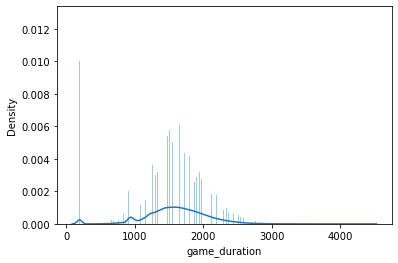

In [18]:
sns.distplot(df['game_duration'], bins = 20000)

In [25]:
df.loc[df['game_duration'] >= 220, 'game_category'] = 'Remake'

In [26]:
df.loc[(df['game_duration'] > 190) & (df['game_duration'] < 1200), 'game_category'] = 'Short Game'

In [27]:
df.loc[(df['game_duration'] >= 1200) & (df['game_duration'] < 2100), 'game_category'] = 'Average Game'

In [28]:
df.loc[df['game_duration'] >= 2100, 'game_category'] = 'Late Game'

In [29]:
df['game_category'].value_counts(dropna = False)

Average Game    297300
Short Game       54542
Late Game        48094
Remake              64
Name: game_category, dtype: int64

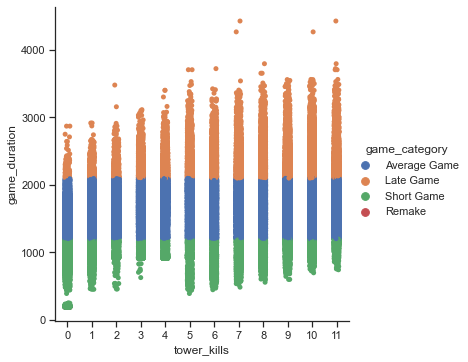

In [30]:
sns.set(style="ticks")
cat = sns.catplot(x = "tower_kills", y = 'game_duration', hue= 'game_category', data = df)

For our data, we have records for both teams of the same game, 

ie. a match that went to 1230 (20 minutes 30 seconds) would be considered 'Average Game' but we would have 2 tower_kills recorded, so we could have a team that played well and gained a lead taking all 11 towers, while their opponet never found their footing and didnt secure any towers.

This reasoning is most likely why the scatterplot's color hue looks so linear

## 07. Revist questions

1.	What regions have the longest game durations? 
2.	What region have the most placed wards?
3.	Do high wards placed make you more likely to win?
4.	Are there any trends in the players? Do they change between regions?
5.	What champions have the highest pick rate? Does it change between region?

Due the nature of my questions, I cannot definitively answer my questions. However, possible question 3 is answerable, 'Do high wards placed make you more likely to win?', well it has a positve correlation of 0.026, although a very weak positive correlation, it shows very minimal support that higher ward_counts can be beneficially to match victorys. Issue with this however, if both teams have high ward counts, our dataset has match win as a boolean of 0/1 which means our data could be skewed, but with further calculations and code lines its possible to answer

## 08. Define a hypothesis

A hypothesis I have that we can possibly check is, tallying up objective score (we could add all the 'first_"objective"' scores together into a new column) and find a correlation between objective score and win, in order to find if taking early or first objectives makes you more likely to win a match.